# Understanding Ridge and Lasso Regression with Simulated Data


In [1]:
# Step 1: simulate data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(25)

# Simulate data
n, p = 100, 10  # 100 observations, 10 predictors
X = np.random.randn(n, p)

# Create a sparse true beta (only a few non-zero coefficients)
true_beta = np.array([3, -2, 1.5, 0, 0, 0, 0, 0, 0, 0])

# Introduce multicollinearity: 
X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, n)  # X2 ~ X1 + small noise
X[:, 2] = X[:, 0] - np.random.normal(0, 0.1, n)  # X3 ~ X1 - small noise

# Generate response variable
y = X @ true_beta + np.random.normal(0, 1, n)  # Add noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# step 2: fit a ridge model
# Define a range of alpha values
alpha_range = np.logspace(-3, 3, 100)

# Ridge regression with 10-fold CV
ridge_cv = RidgeCV(alphas=alpha_range, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)



# Get best alpha
print(f'Best alpha for Ridge regression: {ridge_cv.alpha_:.4f}')  # ask why we need that underscore

Best alpha for Ridge regression: 0.0327


In [5]:
# Step 3: fit a lasso model
# Lasso regression with 10-fold CV
alpha_range = np.logspace(-3, 3, 100)
lasso_cv = LassoCV(alphas=alpha_range, cv=10, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Get best alpha
print(f"Best alpha value for Lasso regression: {lasso_cv.alpha_:.4f}")
y_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso regression test MSE: {lasso_mse:.4f}")

Best alpha value for Lasso regression: 0.0010
Lasso regression test MSE: 0.9833


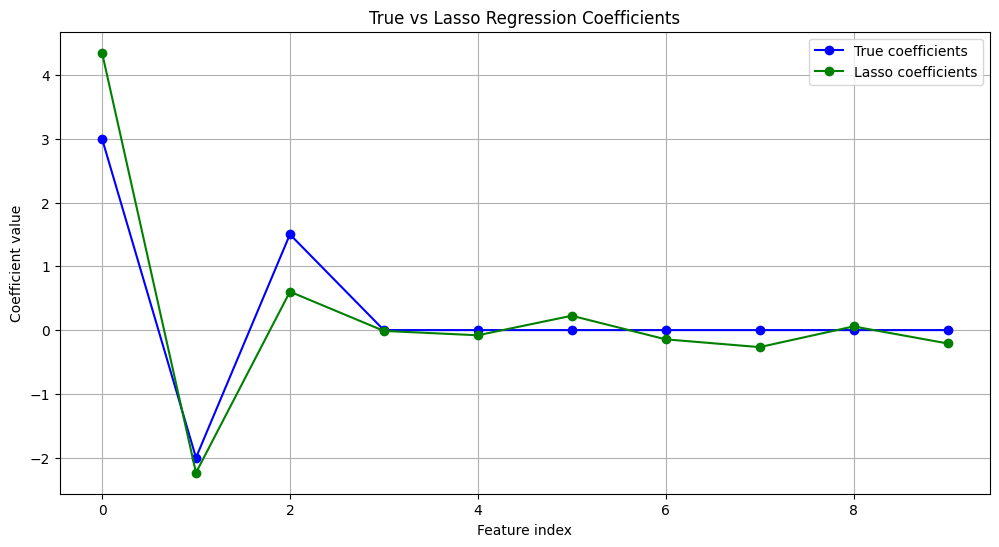

In [6]:
# compare coefficients in a plot

plt.figure(figsize=(12, 6))
plt.plot(range(p), true_beta, 'bo-', label='True coefficients')
plt.plot(range(p), lasso_cv.coef_, 'go-', label='Lasso coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('True vs Lasso Regression Coefficients')
plt.legend()
plt.grid(True)
plt.show()


Model Performance Comparison:
OLS MSE: 0.9792
Ridge MSE (Optimal Alpha): 0.9399
Lasso MSE (Optimal Alpha): 0.9833


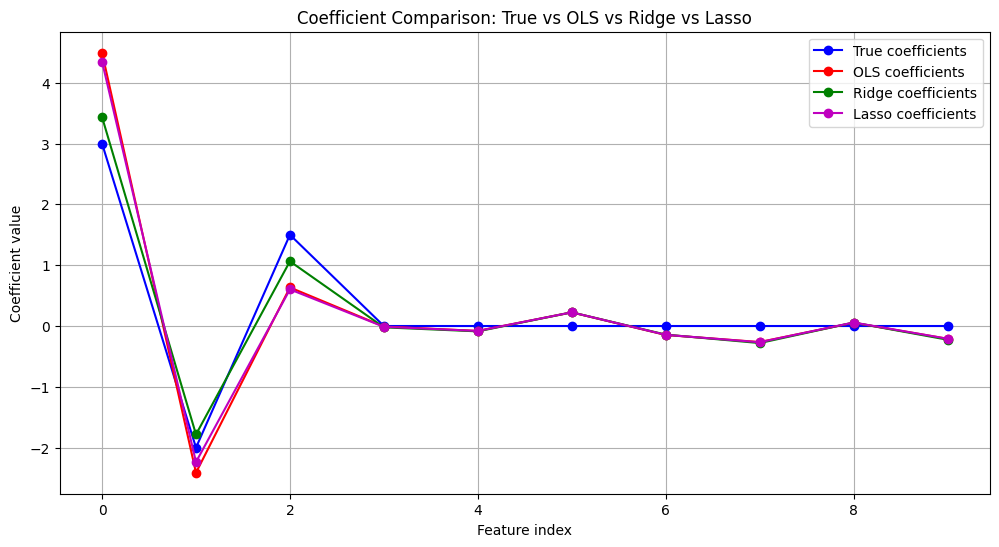


OLS Coefficients:
Feature 0: 4.4931
Feature 1: -2.4122
Feature 2: 0.6339
Feature 3: -0.0091
Feature 4: -0.0808
Feature 5: 0.2243
Feature 6: -0.1472
Feature 7: -0.2639
Feature 8: 0.0536
Feature 9: -0.2100


In [8]:
# compare Ridge and LASSO to OLS

# Fit OLS
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)
ols_mse = mean_squared_error(y_test, y_pred_ols)

# Fit Ridge (for comparison)
alpha_range = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alpha_range, cv=10)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Fit Lasso (for comparison)
lasso_cv = LassoCV(alphas=alpha_range, cv=10, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Print comparison of MSEs
print("Model Performance Comparison:")
print(f"OLS MSE: {ols_mse:.4f}")
print(f"Ridge MSE (Optimal Alpha): {ridge_mse:.4f}")
print(f"Lasso MSE (Optimal Alpha): {lasso_mse:.4f}")

# Plot coefficients comparison
plt.figure(figsize=(12, 6))
plt.plot(range(p), true_beta, 'bo-', label='True coefficients')
plt.plot(range(p), ols.coef_, 'ro-', label='OLS coefficients')
plt.plot(range(p), ridge_cv.coef_, 'go-', label='Ridge coefficients')
plt.plot(range(p), lasso_cv.coef_, 'mo-', label='Lasso coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Coefficient Comparison: True vs OLS vs Ridge vs Lasso')
plt.legend()
plt.grid(True)
plt.show()

# Print OLS coefficients
print("\nOLS Coefficients:")
for i, coef in enumerate(ols.coef_):
    print(f"Feature {i}: {coef:.4f}")

# Discussion Questions
1. How does cross-validation help in choosing the best alpha?
    The model is trained k times, each time using k-1 folds for training, with the remaining fold for validation. MSE is calculated for each validation fold. Then we use the mean and standard deviation of these MSEs to choose the best alpha, namely where the MSE is minimized, balancing bias and variance.
2. How do Ridge and Lasso compare in terms of MSE?
    Ridge achieves a slightly lower MSE compared to Ridge regression.
3. Does Lasso set coefficients to zero for irrelevant variables?
    Yes, LASSO can perform sparse selection.
4. When might Ridge be preferred over Lasso, especially in financial datasets?
    Ridge is more robust to multicollinearity issues.